In [84]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Variabel input dan output
luas_lahan = ctrl.Antecedent(np.arange(0, 6.1, 0.1), 'Luas Lahan')
produksi_padi = ctrl.Antecedent(np.arange(0, 9.1, 0.1), 'Produksi Padi')
irigasi = ctrl.Antecedent(np.arange(0, 18.1, 0.1), 'Irigasi')
subsidi = ctrl.Consequent(np.arange(0, 12.1, 0.1), 'Subsidi')

In [115]:
# Fungsi keanggotaan
luas_lahan['Kecil'] = fuzz.trimf(luas_lahan.universe, [0, 1, 2])
luas_lahan['Sedikit Sedang'] = fuzz.trimf(luas_lahan.universe, [1, 2, 3])
luas_lahan['Sedang'] = fuzz.trimf(luas_lahan.universe, [2, 3, 4])
luas_lahan['Sedikit Tinggi'] = fuzz.trimf(luas_lahan.universe, [3, 4, 5])
luas_lahan['Tinggi'] = fuzz.trimf(luas_lahan.universe, [4, 5, 6])

produksi_padi['Kecil'] = fuzz.trimf(produksi_padi.universe, [0, 1.5, 3])
produksi_padi['Sedikit Sedang'] = fuzz.trimf(produksi_padi.universe, [1.5, 3, 4.5])
produksi_padi['Sedang'] = fuzz.trimf(produksi_padi.universe, [3, 4.5, 6])
produksi_padi['Sedikit Tinggi'] = fuzz.trimf(produksi_padi.universe, [4.5, 6, 7.5])
produksi_padi['Tinggi'] = fuzz.trimf(produksi_padi.universe, [6, 7.5, 9])

irigasi['Kecil'] = fuzz.trimf(irigasi.universe, [0, 3, 6])
irigasi['Sedikit Sedang'] = fuzz.trimf(irigasi.universe, [3, 6, 9])
irigasi['Sedang'] = fuzz.trimf(irigasi.universe, [6, 9, 12])
irigasi['Sedikit Tinggi'] = fuzz.trimf(irigasi.universe, [9, 12, 15])
irigasi['Tinggi'] = fuzz.trimf(irigasi.universe, [12, 15, 18])

subsidi['Kecil'] = fuzz.trimf(subsidi.universe, [0, 2, 4])
subsidi['Sedikit Sedang'] = fuzz.trimf(subsidi.universe, [2, 4, 6])
subsidi['Sedang'] = fuzz.trimf(subsidi.universe, [4, 6, 8])
subsidi['Sedikit Tinggi'] = fuzz.trimf(subsidi.universe, [6, 8, 10])
subsidi['Tinggi'] = fuzz.trimf(subsidi.universe, [8, 10, 12])

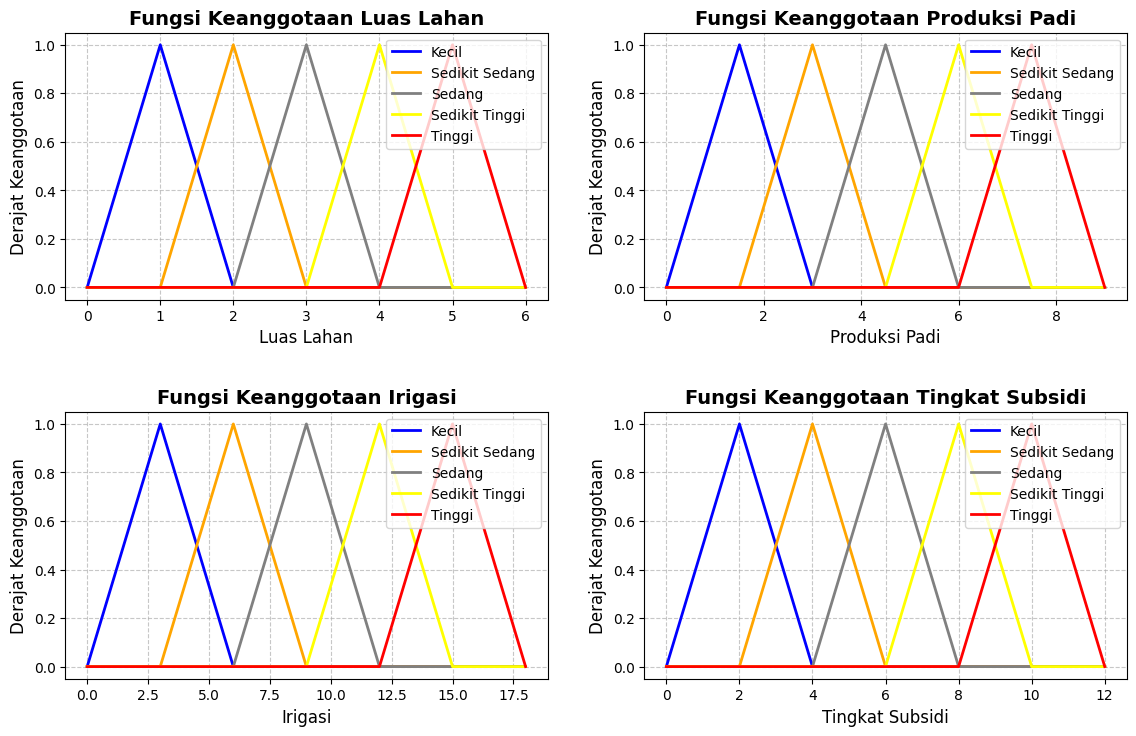

In [116]:
# Fungsi untuk menampilkan grafik dalam subplot
def plot_membership(var, title, ax):
    colors = ['blue', 'orange', 'gray', 'yellow', 'red']  # Pilihan warna berbeda
    linestyle = '-'  # Hanya garis biasa
    
    for i, (term, mf) in enumerate(var.terms.items()):
        ax.plot(var.universe, mf.mf, label=term, color=colors[i % len(colors)], linestyle=linestyle, linewidth=2)
    
    ax.set_title(f'Fungsi Keanggotaan {title}', fontsize=14, fontweight='bold')
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel('Derajat Keanggotaan', fontsize=12)
    ax.legend(fontsize=10, loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.7)

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 baris, 2 kolom

# Plot masing-masing grafik ke subplot
plot_membership(luas_lahan, 'Luas Lahan', axes[0, 0])
plot_membership(produksi_padi, 'Produksi Padi', axes[0, 1])
plot_membership(irigasi, 'Irigasi', axes[1, 0])
plot_membership(subsidi, 'Tingkat Subsidi', axes[1, 1])

# Menyesuaikan layout agar tidak bertumpuk
plt.tight_layout(pad=3)
plt.show()

In [118]:
rules = [
    ctrl.Rule(luas_lahan['Kecil'] & produksi_padi['Kecil'] & irigasi['Kecil'], subsidi['Tinggi']),
    ctrl.Rule(luas_lahan['Kecil'] & produksi_padi['Kecil'] & irigasi['Sedikit Sedang'], subsidi['Tinggi']),
    ctrl.Rule(luas_lahan['Kecil'] & produksi_padi['Sedikit Sedang'] & irigasi['Kecil'], subsidi['Tinggi']),
    ctrl.Rule(luas_lahan['Kecil'] & produksi_padi['Sedikit Sedang'] & irigasi['Sedikit Sedang'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Kecil'] & produksi_padi['Sedang'] & irigasi['Kecil'], subsidi['Sedang']),
    
    ctrl.Rule(luas_lahan['Sedikit Sedang'] & produksi_padi['Kecil'] & irigasi['Kecil'], subsidi['Tinggi']),
    ctrl.Rule(luas_lahan['Sedikit Sedang'] & produksi_padi['Sedikit Sedang'] & irigasi['Kecil'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedikit Sedang'] & produksi_padi['Sedang'] & irigasi['Sedikit Sedang'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedikit Sedang'] & produksi_padi['Sedikit Tinggi'] & irigasi['Kecil'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedikit Sedang'] & produksi_padi['Tinggi'] & irigasi['Sedikit Sedang'], subsidi['Kecil']),
    
    ctrl.Rule(luas_lahan['Sedang'] & produksi_padi['Kecil'] & irigasi['Sedikit Sedang'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedang'] & produksi_padi['Sedikit Sedang'] & irigasi['Sedang'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedang'] & produksi_padi['Sedang'] & irigasi['Sedang'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedang'] & produksi_padi['Sedikit Tinggi'] & irigasi['Sedang'], subsidi['Kecil']),
    ctrl.Rule(luas_lahan['Sedang'] & produksi_padi['Tinggi'] & irigasi['Sedikit Tinggi'], subsidi['Kecil']),
    
    ctrl.Rule(luas_lahan['Sedikit Tinggi'] & produksi_padi['Kecil'] & irigasi['Sedang'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedikit Tinggi'] & produksi_padi['Sedikit Sedang'] & irigasi['Sedikit Tinggi'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Sedikit Tinggi'] & produksi_padi['Sedang'] & irigasi['Tinggi'], subsidi['Kecil']),
    ctrl.Rule(luas_lahan['Sedikit Tinggi'] & produksi_padi['Sedikit Tinggi'] & irigasi['Tinggi'], subsidi['Kecil']),
    ctrl.Rule(luas_lahan['Sedikit Tinggi'] & produksi_padi['Tinggi'] & irigasi['Tinggi'], subsidi['Kecil']),
    
    ctrl.Rule(luas_lahan['Tinggi'] & produksi_padi['Kecil'] & irigasi['Sedikit Tinggi'], subsidi['Sedang']),
    ctrl.Rule(luas_lahan['Tinggi'] & produksi_padi['Sedikit Sedang'] & irigasi['Tinggi'], subsidi['Kecil']),
    ctrl.Rule(luas_lahan['Tinggi'] & produksi_padi['Sedang'] & irigasi['Tinggi'], subsidi['Kecil']),
    ctrl.Rule(luas_lahan['Tinggi'] & produksi_padi['Sedikit Tinggi'] & irigasi['Tinggi'], subsidi['Kecil']),
    ctrl.Rule(luas_lahan['Tinggi'] & produksi_padi['Tinggi'] & irigasi['Tinggi'], subsidi['Kecil']),
]

In [119]:
# Membuat sistem kendali fuzzy
subsidi_ctrl = ctrl.ControlSystem(rules)
subsidi_simulation = ctrl.ControlSystemSimulation(subsidi_ctrl)
subsidi.defuzzify_method = 'centroid'


# Studi Kasus 1
subsidi_simulation.input['Luas Lahan'] = 1.5
subsidi_simulation.input['Produksi Padi'] = 2.0
subsidi_simulation.input['Irigasi'] = 3.5
subsidi_simulation.compute()
hasil_subsidi_1 = subsidi_simulation.output['Subsidi']

# Studi Kasus 2
subsidi_simulation.input['Luas Lahan'] = 4.5
subsidi_simulation.input['Produksi Padi'] = 6.5
subsidi_simulation.input['Irigasi'] = 14
subsidi_simulation.compute()
hasil_subsidi_2 = subsidi_simulation.output['Subsidi']

# Studi Kasus 3
subsidi_simulation.input['Luas Lahan'] = 5.0
subsidi_simulation.input['Produksi Padi'] = 4.0
subsidi_simulation.input['Irigasi'] = 13
subsidi_simulation.compute()
hasil_subsidi_3 = subsidi_simulation.output['Subsidi']

print("=" * 50)
print("           HASIL PERHITUNGAN SISTEM FUZZY           ")
print("=" * 50)
print(f"Hasil Subsidi Studi Kasus 1 : {hasil_subsidi_1:.4f}")
print(f"Hasil Subsidi Studi Kasus 2 : {hasil_subsidi_2:.4f}")
print(f"Hasil Subsidi Studi Kasus 3 : {hasil_subsidi_3:.4f}")
print("=" * 50)

# Verifikasi metode defuzzifikasi
print(f"Metode Defuzzifikasi yang digunakan: {subsidi.defuzzify_method}")


           HASIL PERHITUNGAN SISTEM FUZZY           
Hasil Subsidi Studi Kasus 1 : 8.2979
Hasil Subsidi Studi Kasus 2 : 2.0000
Hasil Subsidi Studi Kasus 3 : 2.0000
Metode Defuzzifikasi yang digunakan: centroid
